In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 你也可以讀入 Fasion 版的 MNIST

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
n = 9487

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

1

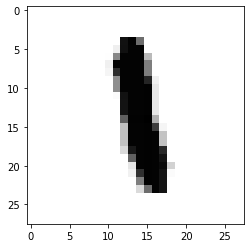

In [10]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [11]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [13]:
model = Sequential()

In [14]:
model.add(Dense(100, input_dim=784, activation='relu'))

In [15]:
model.add(Dense(100, activation='relu'))

In [16]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [17]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), 
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


#### 欣賞我們的作品

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [19]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 0.0820 - accuracy: 0.3703
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.6663
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0319 - accuracy: 0.8210
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.8691
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0192 - accuracy: 0.8853
Epoch 6/20
600/600 [==============================] - 2s 2ms/step - loss: 0.0172 - accuracy: 0.8944
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy: 0.9010
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 0.9052
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9092
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9122

### 6. step 3: 預測 (testing)

In [21]:
#predict = model.predict_classes(x_test)
predict = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 0s 903us/step


神經網路預測是: 6


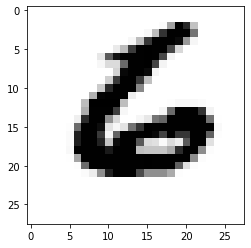

In [22]:
n = 9999

print('神經網路預測是:', predict[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [23]:
model.save("my_nn.h5")

In [24]:
import tensorflow as tf

In [25]:
tf.test.gpu_device_name()

''